In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import plotly.express    as px
from sklearn.utils       import resample

from tensorflow import keras
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from io import BytesIO
from zipfile import ZipFile
from PIL import Image


# load ISIC 2019 ground truth

In [2]:
path_data = '~/PycharmProjects/skin-image-classification/data/'

In [3]:
isic_df_groud = pd.read_csv(path_data+'ISIC_2019_Training_GroundTruth.csv')
print(isic_df_groud.shape)
isic_df_groud.head(3)

(25331, 10)


image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0

## count image for each category

In [4]:
cols = list(isic_df_groud.columns[1:])

for i in range(0,len(cols)):
      print("Total images of " + cols[i]+ " : "+ str(len(isic_df_groud[isic_df_groud[cols[i]]>0])))

Total images of MEL : 4522
Total images of NV : 12875
Total images of BCC : 3323
Total images of AK : 867
Total images of BKL : 2624
Total images of DF : 239
Total images of VASC : 253
Total images of SCC : 628
Total images of UNK : 0


**Abbreviations used in the dataset**


<li><b>MEL:</b> Melanoma — a malignant neoplasm derived from melanocytes </li>
<li><b>NV:</b> Melanocytic nevi — benign neoplasms of melanocytes </li>
<li><b>BCC:</b> Basal cell carcinoma — a common variant of epithelial skin cancer that rarely metastasizes but grows destructively if untreated (bccs do not necessarily produce pigmented lesions)</li>
<li><b>AK:</b> Actinic Keratoses and intraepithelial Carcinoma — common non-invasive, variants of squamous cell carcinoma that can be treated locally without surgery</li>
<li><b>BKL:</b> Benign keratosis — a generic class that includes seborrheic keratoses, solar lentigo and lichen-planus like keratoses</li>
<li><b>DF:</b> Dermatofibroma — a benign skin lesion regarded as either a benign proliferation or an inflammatory reaction to minimal trauma</li>
<li><b>VASC:</b> Vascular skin lesions ranging from cherry angiomas to angiokeratomas and pyogenic granulomas</li>
<li><b>SCC:</b> Squamous cell carcinoma — a common form of skin cancer that develops in the squamous cells that make up the middle and outer layers of the skin</li>
<li><b>UNK:</b> None of the others
</li>

In [23]:
fn = '../data/image/ISIC_2019_Training_Input.zip'
fn.split('/')[-1].split('.')[0]

'ISIC_2019_Training_Input'

# sample of image

MEL
NV
BCC
AK
BKL
DF
VASC
SCC


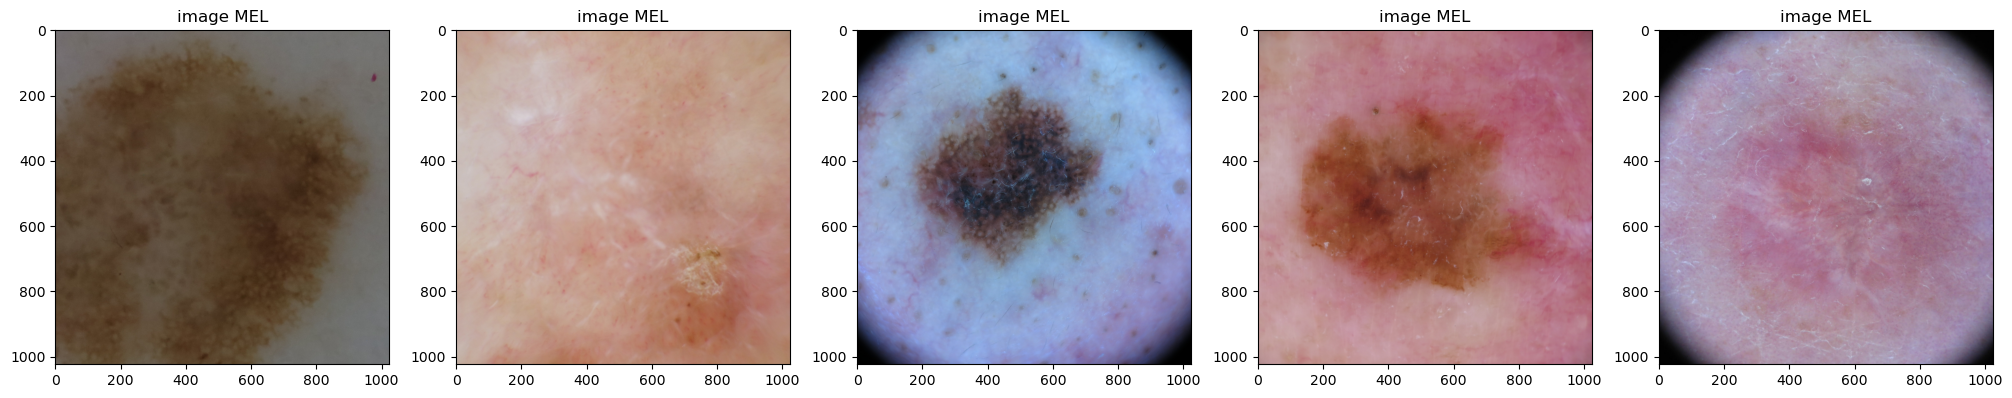

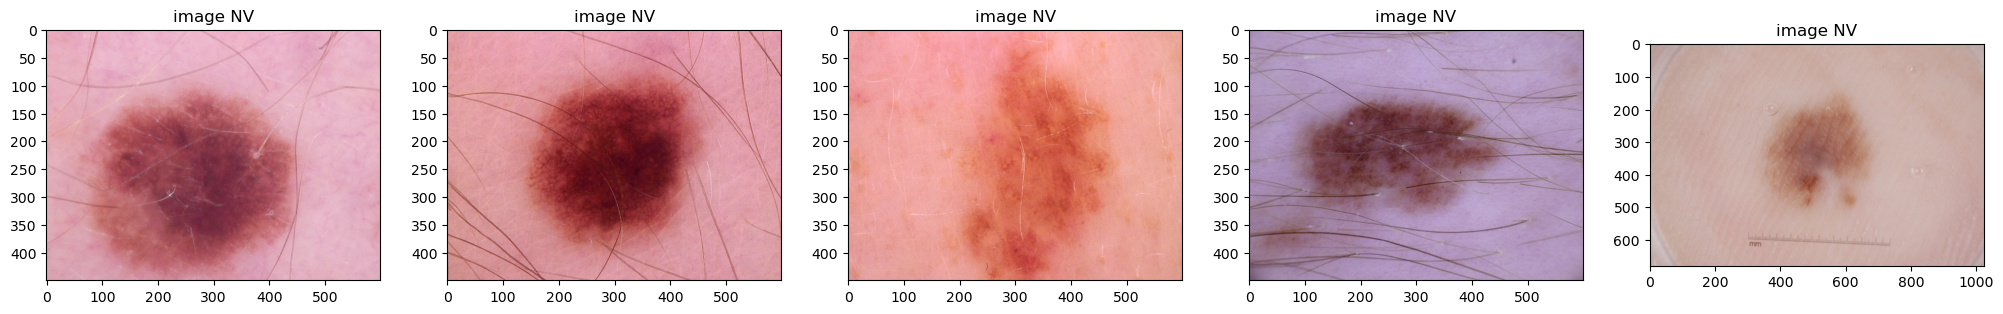

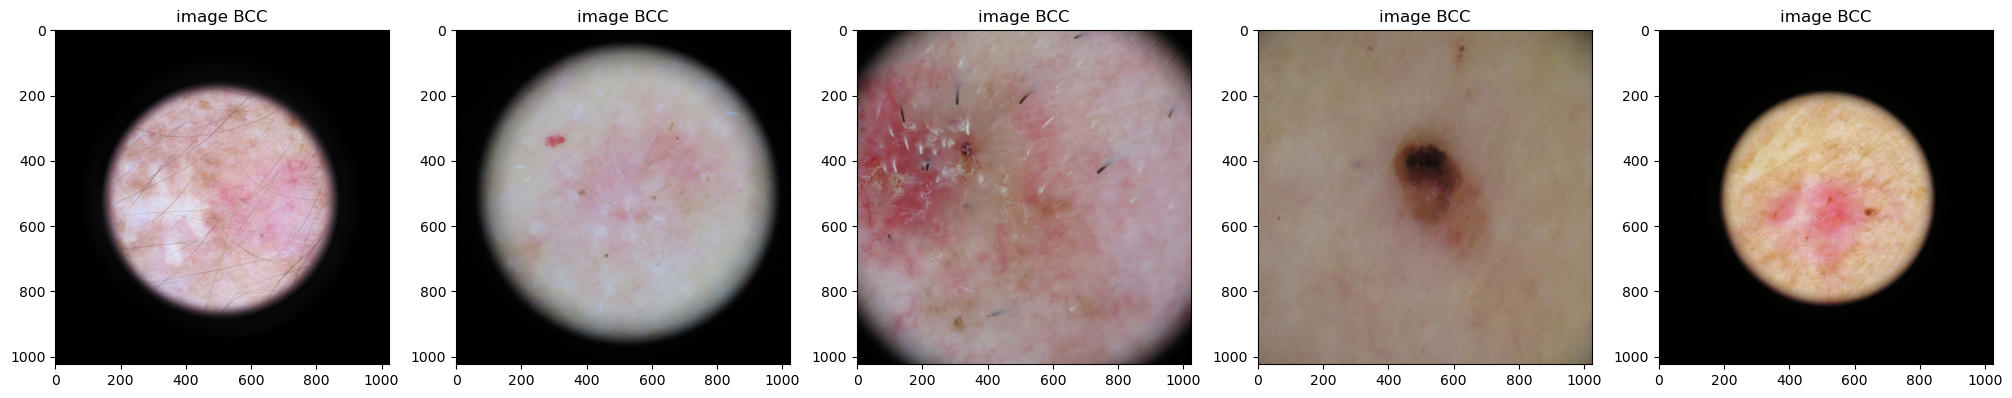

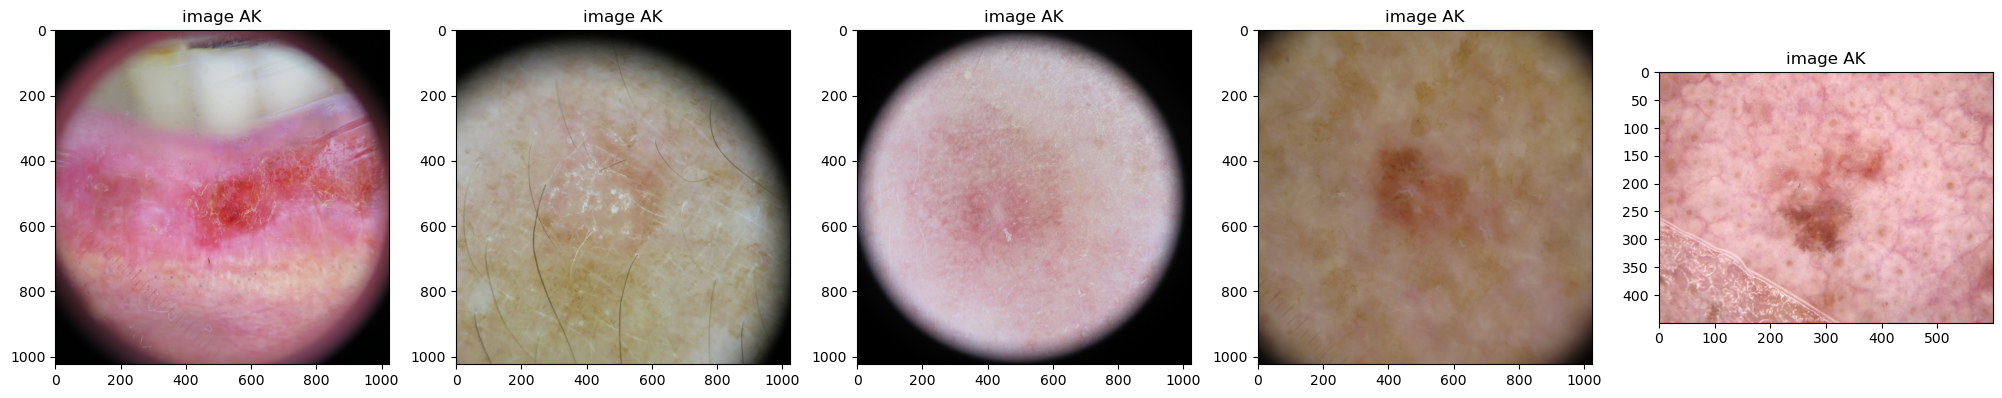

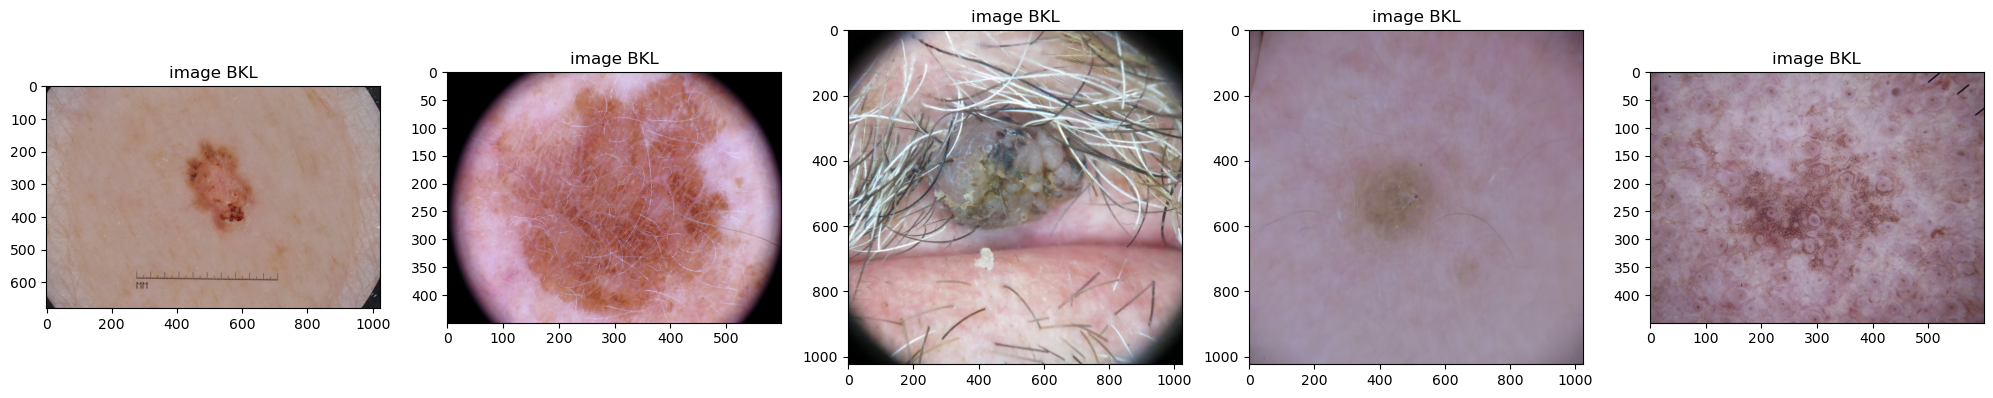

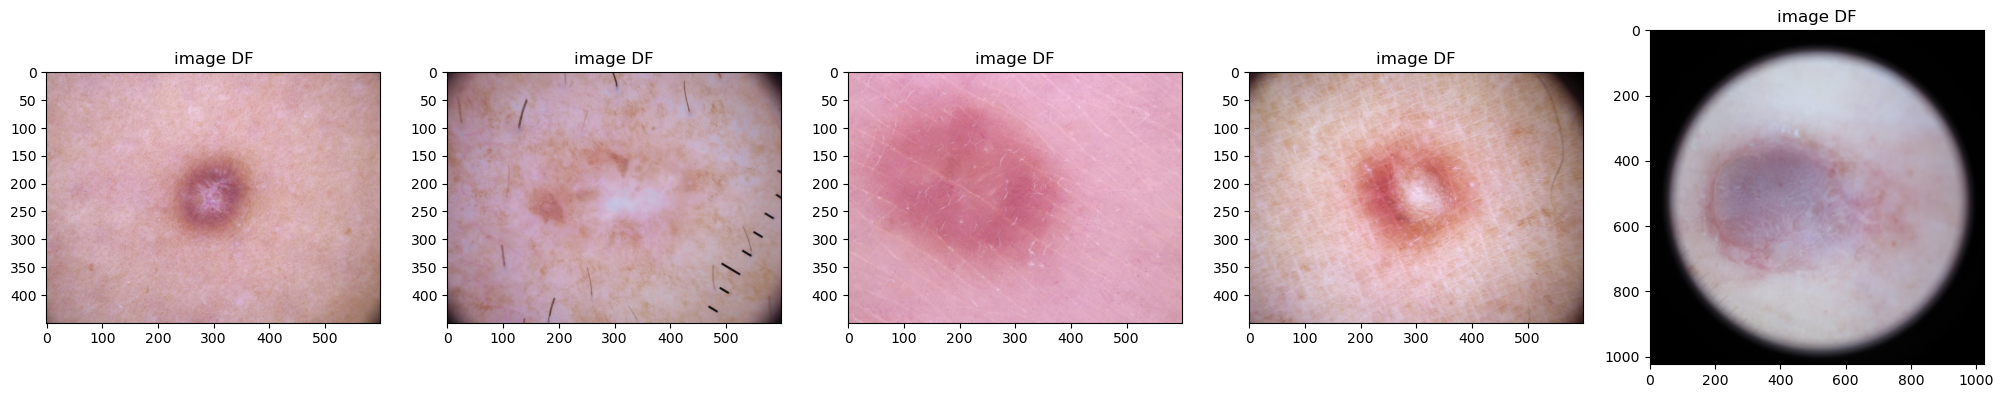

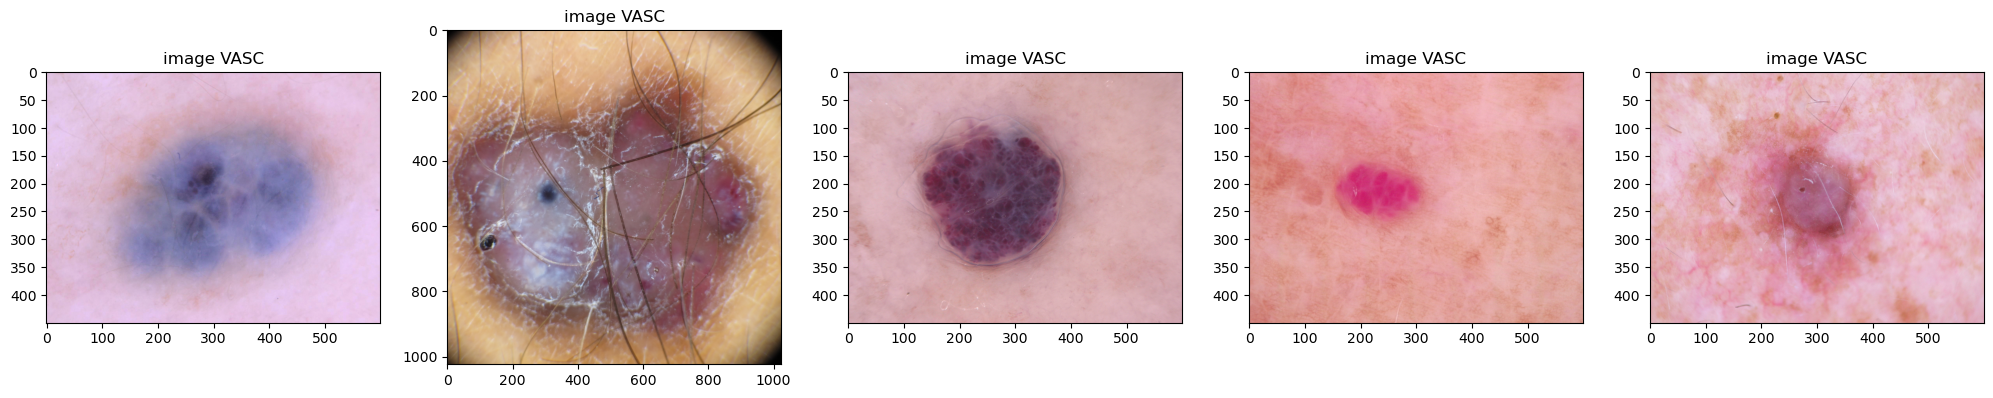

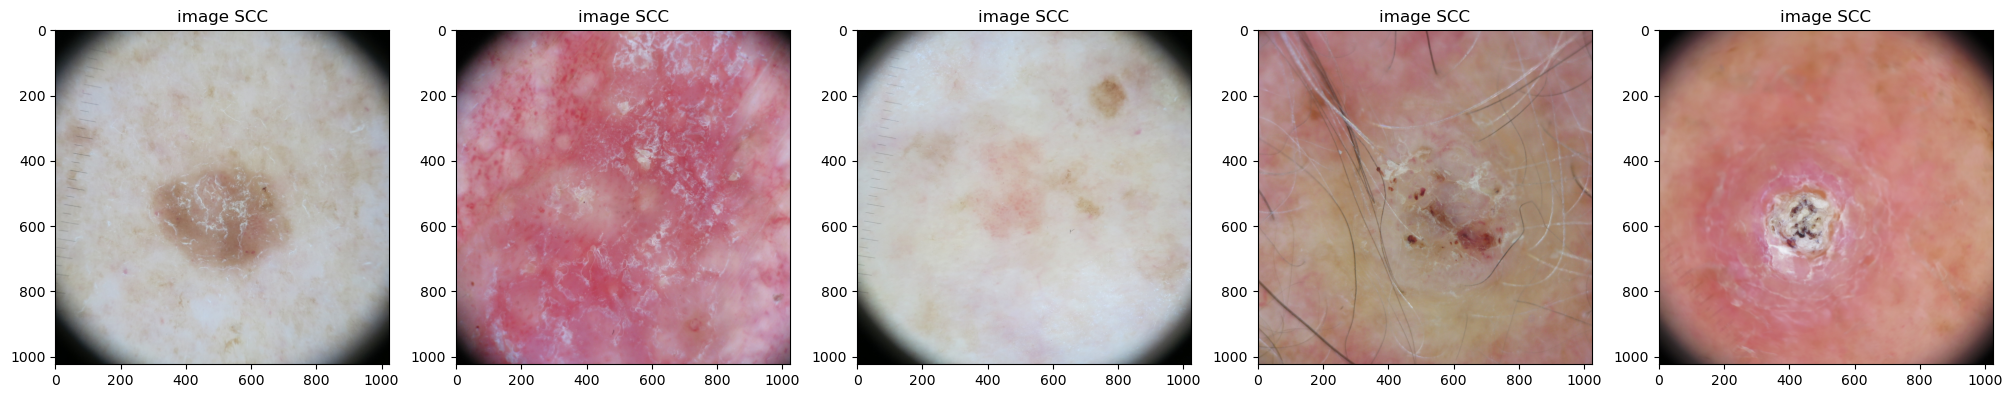

In [37]:
#read image from zip file

def get_images(diagnosis, file_name):
    fig, ax = plt.subplots(1,5,figsize=(25, 25))
    for i in range(5):
        with ZipFile(file_name, 'r') as zfile:
            image_index = random.choice(isic_df_groud.loc[isic_df_groud[diagnosis]==1.0]['image'].reset_index(drop=True))
            folder_nm = file_name.split('/')[-1].split('.')[0]
            data = zfile.read(f'{folder_nm}/{image_index}.jpg')
            processedImg = Image.open(BytesIO(data))
            ax[i].set_title(f'image {str(diagnosis)}')
            ax[i].imshow(processedImg)

# show sample of each category except UNK
for name_diagnosis in isic_df_groud.columns[1:-1]:
    get_images(name_diagnosis,'../data/image/ISIC_2019_Training_Input.zip')


# Load ISIC 2020 data

In [7]:
isic20_df_groud = pd.read_csv(path_data+'ISIC_2020_Training_GroundTruth.csv')
print(isic20_df_groud.shape)
isic20_df_groud.head(3)

(33126, 8)


image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0

<Axes: title={'center': 'ISIC2020 image count by category'}, xlabel='image count', ylabel='diagnosis'>

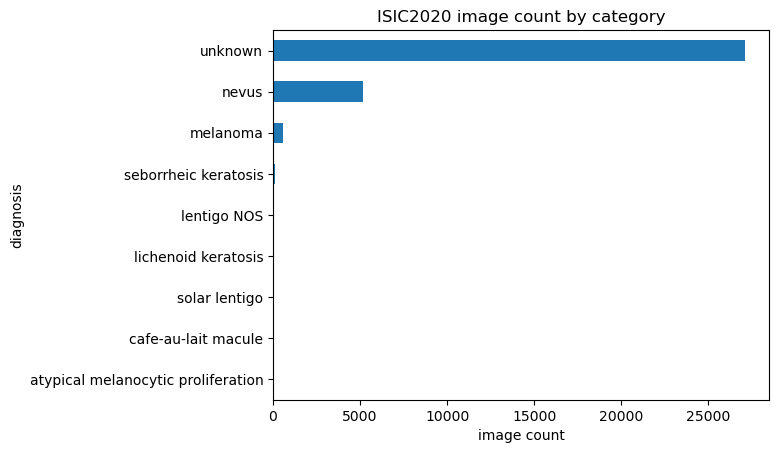

In [18]:
isic20_df_groud.groupby(['diagnosis'])['image_name'].size().sort_values(ascending = True).plot(kind = 'barh', \
                                                                                               title = 'ISIC2020 image count by category',
                                                                                              xlabel = 'image count')

In [39]:
isic20_df_groud['diagnosis'].unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

In [42]:
isic20_df_groud.loc[isic20_df_groud['unknown']]

KeyError: 'unknown'